# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
print(combined_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()


249

In [4]:
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_df = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = combined_data[combined_data.duplicated(subset=["Mouse ID"], keep=False)]
duplicate_mouse_ids


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clea_df = combined_data[combined_data["Mouse ID"]!="g989"]
clea_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_unique_mice = clea_df["Mouse ID"].nunique()
print(f"There are {number_of_unique_mice} unique mice in the cleaned DataFrame.")



There are 248 unique mice in the cleaned DataFrame.


## Summary Statistics

In [10]:
# Generate a summary statistics table for tumor volume by drug regimen

summary_stats = clea_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_Tumor_Volume='var',
    std_dev_Tumor_Volume='std',
    Sem_Tumor_Volume='sem'  
).reset_index()

# Display the summary statistics DataFrame
summary_stats

,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,std_dev_Tumor_Volume,Sem_Tumor_Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clea_df['Tumor Volume (mm3)'].groupby(clea_df['Drug Regimen']).mean()
median = clea_df['Tumor Volume (mm3)'].groupby(clea_df['Drug Regimen']).median()
var = clea_df['Tumor Volume (mm3)'].groupby(clea_df['Drug Regimen']).var()
std = clea_df['Tumor Volume (mm3)'].groupby(clea_df['Drug Regimen']).std()
sem = clea_df['Tumor Volume (mm3)'].groupby(clea_df['Drug Regimen']).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clea_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Variance_Tumor_Volume='var',
    std_dev_Tumor_Volume='std',
    Sem_Tumor_Volume='sem'  
).reset_index()

# Display the summary statistics DataFrame
print(f"Table of the tumor volume for each regimen")
summary_stats


Table of the tumor volume for each regimen


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,std_dev_Tumor_Volume,Sem_Tumor_Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clea_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

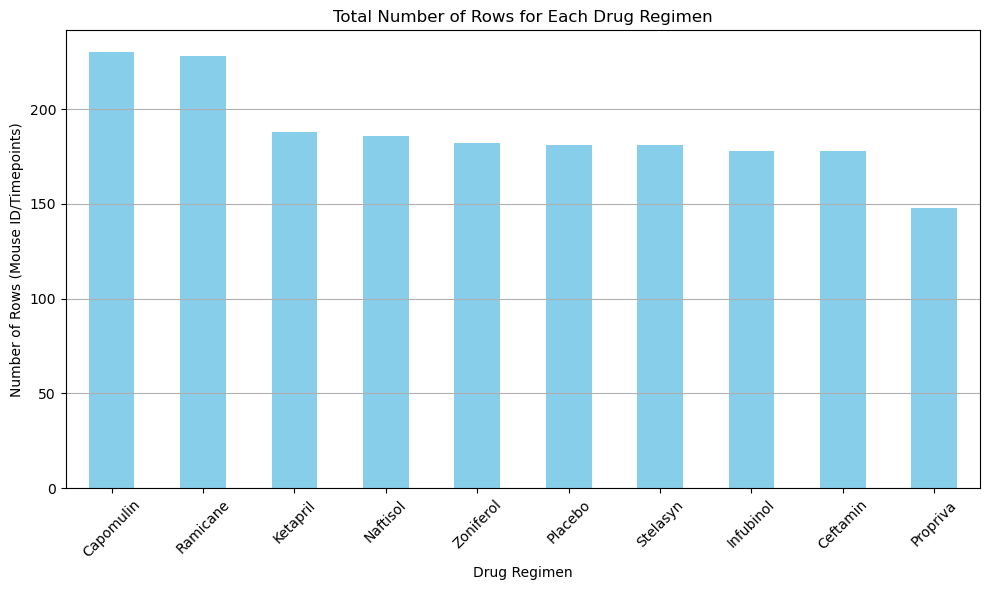

In [14]:
#combined_data = pd.DataFrame(data)
drug_regimen_counts = clea_df['Drug Regimen'].value_counts()
#drug_regimen_counts = combined_data['Mouse ID'].value_counts()
#drug_regimen_counts = combined_data['Timepoints'].value_counts()

# Generate a bar plot
plt.figure(figsize=(10, 6))
drug_regimen_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

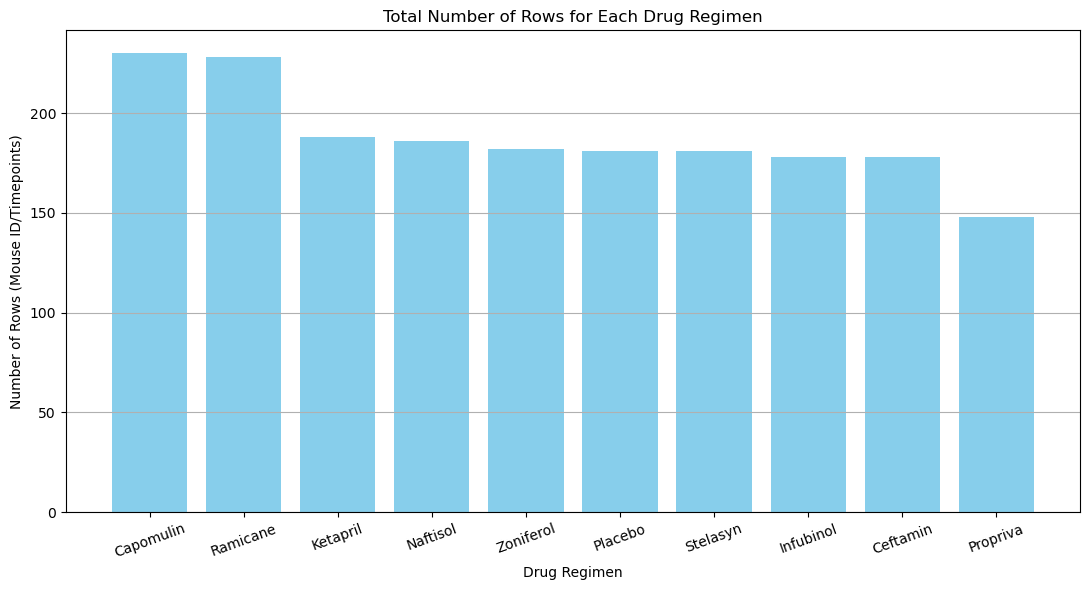

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clea_df['Drug Regimen'].value_counts()
drug_regimen_counts 
plt.figure(figsize=(11, 6))  # Set the figure size
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')  # Create a bar plot

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # 

In [ ]:
#--------------------------------------------

In [16]:
bygender = clea_df.groupby("Sex").count()
bygender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [17]:
labels = [clea_df['Sex'].unique()]
newlist = list(bygender.index)
newlist

['Female', 'Male']

In [18]:
sizes_ = [bygender["Mouse ID"]]
sizes_

[Sex
 Female    922
 Male      958
 Name: Mouse ID, dtype: int64]

In [ ]:
#---------------------------------------------------

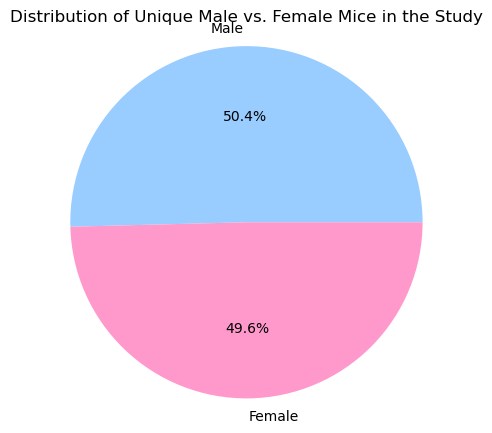

In [88]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
mouse_data = pd.DataFrame(clea_df)
unique_mice = mouse_data.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['#99CCFF', '#FF99CC'], figsize=(5, 5))
plt.title('Distribution of Unique Male vs. Female Mice in the Study')
plt.ylabel('')  # Removes the default y-label that Pandas adds
plt.axis('equal')  # Ensures that pie is drawn as a circle
plt.show()


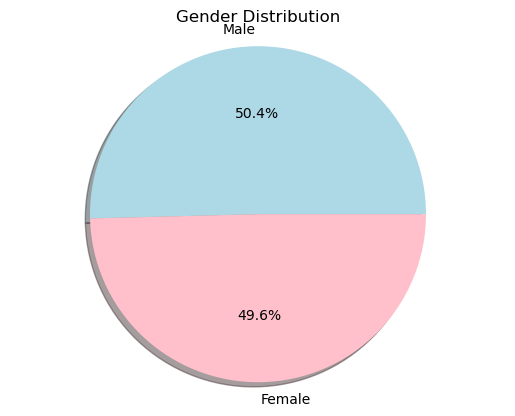

In [90]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_df = pd.DataFrame(clea_df)
unique_mice = gender_df.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()

labels = gender_counts.index  # ['Male', 'Female']
sizes = gender_counts.values  # Corresponding counts of each gender
colors = ['lightblue', 'pink']  # Custom colors for male and female

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=colors, shadow=True)

# Get the unique mice with their gender
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


# Make the pie chart



# Quartiles, Outliers and Boxplots

In [22]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clea_df.loc[clea_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clea_df.loc[clea_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clea_df.loc[clea_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clea_df.loc[clea_df["Drug Regimen"] == "Ceftamin", :]

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_last, clea_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [24]:
#capomulin
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_last, clea_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ramicane tumors: {lowerq}")
print(f"The upper quartile of ramicane tumors: {upperq}")
print(f"The interquartile range of ramicane tumors: {iqr}")
print(f"The median of ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane tumors: 31.56046955
The upper quartile of ramicane tumors: 40.65900627
The interquartile range of ramicane tumors: 9.098536719999998
The median of ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_last, clea_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of infubinol tumors: {lowerq}")
print(f"The upper quartile of infubinol tumors: {upperq}")
print(f"The interquartile range of infubinol tumors: {iqr}")
print(f"The median of infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumors: 54.04860769
The upper quartile of infubinol tumors: 65.52574285
The interquartile range of infubinol tumors: 11.477135160000003
The median of infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_last, clea_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles =ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ceftamin tumors: {lowerq}")
print(f"The upper quartile of ceftamin tumors: {upperq}")
print(f"The interquartile range of ceftamin tumors: {iqr}")
print(f"The median of ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin tumors: 48.72207785
The upper quartile of ceftamin tumors: 64.29983003
The interquartile range of ceftamin tumors: 15.577752179999997
The median of ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [28]:
#------------------------------------------------

In [29]:
# Check the column names in each DataFrame to ensure 'Tumor Volume (mm3)' exists
dataframes = {
    'Drug Regime': capomulin_df,
    'Drug Regime': ramicane_df,
    'Drug Regime': infubinol_df,
    'Drug Regime': ceftamin_df
}

for name, df in dataframes.items():
    if 'Tumor Volume (mm3)' in df.columns:
        print(f"{name} contains 'Tumor Volume (mm3)'")
    else:
        print(f"{name} does NOT contain 'Tumor Volume (mm3)'")

Drug Regime contains 'Tumor Volume (mm3)'


In [30]:
#------------------------------------------------------

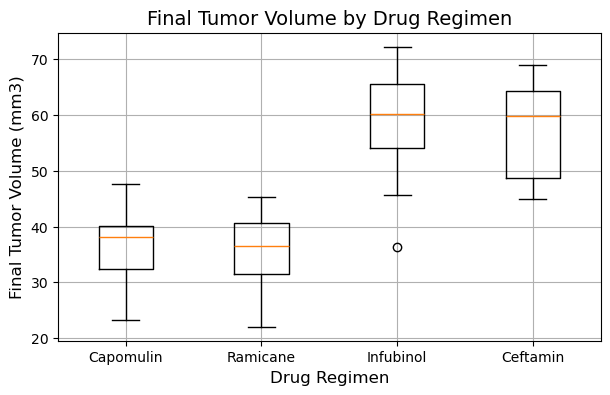

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)'].values
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)'].values
infubinol_tumors = infubinol_merge['Tumor Volume (mm3)'].values
ceftamin_tumors = ceftamin_merge['Tumor Volume (mm3)'].values

# Create the data to plot
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create the box plot
fig1, ax1 = plt.subplots(figsize=(7, 4))
ax1.set_title('Final Tumor Volume by Drug Regimen', fontsize=14)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
ax1.set_xlabel('Drug Regimen', fontsize=12)

# Generate the box plot
ax1.boxplot(data_to_plot, labels=Regimen, widths=0.4, vert=True)

# Show the plot
plt.grid(True)  # Optional: Add grid lines for better readability
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

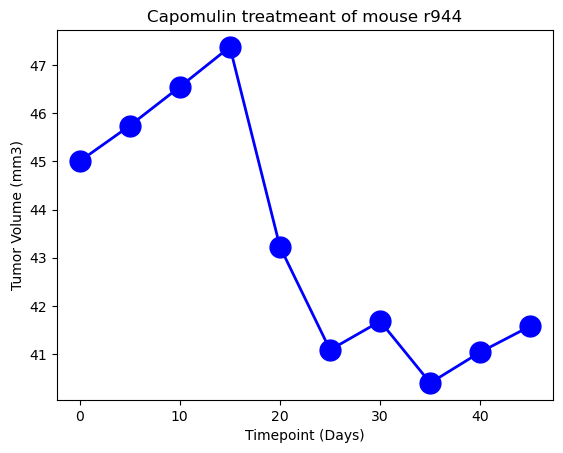

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = capomulin_df.loc[capomulin_df["Mouse ID"] == "r944",:]
mouse_id.head()
x_axis = mouse_id["Timepoint"]
tumsiz = mouse_id["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse r944')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



In [34]:
#----------------------------

In [35]:
mouse_id = capomulin_df.loc[capomulin_df["Mouse ID"] == "r944",:]


In [36]:
capomulin_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [37]:
print(capomulin_df[['Weight (g)', 'Tumor Volume (mm3)']].head())


    Weight (g)  Tumor Volume (mm3)
10          17           45.000000
11          17           43.878496
12          17           37.614948
13          17           38.177232
14          17           36.866876


In [38]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [39]:
#-----------------------------

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clea_df.loc[clea_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")


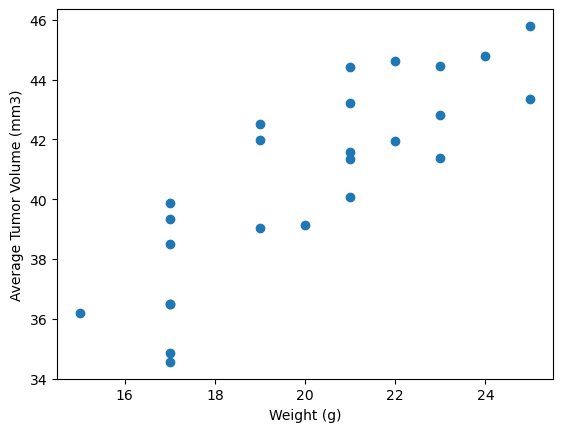

In [41]:

average_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


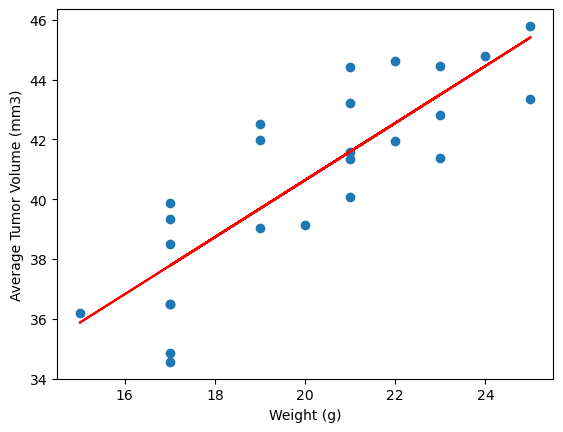

In [43]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, average_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()